# CS4055 Project

### Naichuan Zhang
### Predictive Modelling


## Import Python modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from itertools import cycle

from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc, accuracy_score, f1_score, recall_score
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.model_selection import cross_val_score

%matplotlib inline

In [3]:
df = pd.read_csv('./african_crises.csv')

In [4]:
df.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [5]:
df.describe()

,case,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1.059000e+03,1059.000000,1059.000000,1059.000000
mean,35.613787,1967.767705,0.077432,43.140831,0.039660,0.152975,0.006402,2.084889e+04,0.776204,0.132200,0.129367
std,23.692402,33.530632,0.267401,111.475380,0.195251,0.360133,0.043572,6.757274e+05,0.416984,0.349847,0.335765
min,1.000000,1860.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.850214e+01,0.000000,0.000000,0.000000
25%,15.000000,1951.000000,0.000000,0.195350,0.000000,0.000000,0.000000,2.086162e+00,1.000000,0.000000,0.000000
50%,38.000000,1973.000000,0.000000,0.868400,0.000000,0.000000,0.000000,5.762330e+00,1.000000,0.000000,0.000000
75%,56.000000,1994.000000,0.000000,8.462750,0.000000,0.000000,0.000000,1.164405e+01,1.000000,0.000000,0.000000
max,70.000000,2014.000000,1.000000,744.306139,1.000000,1.000000,0.400000,2.198970e+07,1.000000,2.000000,1.000000


## Data Preparation

Before training and evaluating models, we need to do some data preparation first. We can see that attributes `cc3` and `country` are redundant since we have an attribute `case` to uniquely identify a specific country. So let's drop them.

In [6]:
df = df.drop(['cc3', 'country'], axis=1)

In [7]:
df.head()

,case,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


Then, we can also do some modification on `banking_crisis`. Converting 'crisis' and 'no_crisis' to 1 and 0, respectively.

In [8]:
df = df.replace({'banking_crisis': {'crisis': 1, 'no_crisis': 0}})

In [9]:
df.head()

,case,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,1
1,1,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,0
2,1,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,0
3,1,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,0
4,1,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,0


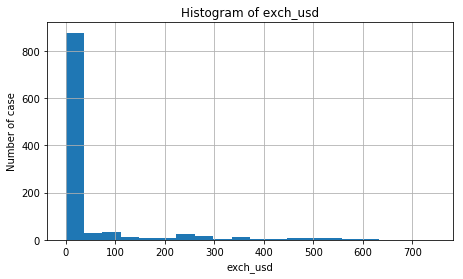

In [10]:
fig = plt.figure(figsize=(16,4))

ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of exch_usd")
ax1.set_xlabel('exch_usd')
ax1.set_ylabel('Number of case')
df['exch_usd'].hist(bins=20)

In [11]:
df['exch_usd']=(df['exch_usd']-df['exch_usd'].min())/(df['exch_usd'].max()-df['exch_usd'].min())

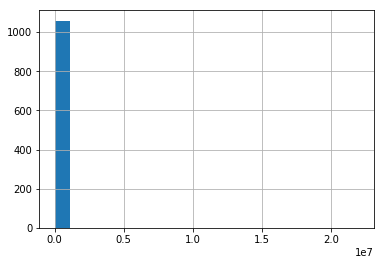

In [12]:
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("Histogram of inflation_annual_cpi")
ax2.set_xlabel('inflation_annual_cpi')
ax2.set_ylabel('Number of case')
df['inflation_annual_cpi'].hist(bins=20) 

In [13]:
df['inflation_annual_cpi'] = np.log(df['inflation_annual_cpi']-df['inflation_annual_cpi'].min()+1)

In [14]:
df['inflation_annual_cpi']=(df['inflation_annual_cpi']-df['inflation_annual_cpi'].min())/(df['inflation_annual_cpi'].max()-df['inflation_annual_cpi'].min())

D:\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


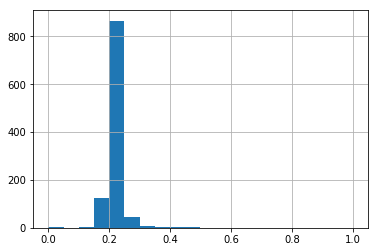

In [15]:
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("Histogram of inflation_annual_cpi(log)")
ax2.set_xlabel('inflation_annual_cpi')
ax2.set_ylabel('Number of case')
df['inflation_annual_cpi'].hist(bins=20) 

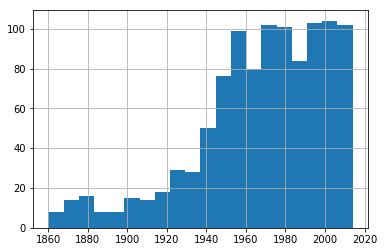

In [16]:
ax3 = fig.add_subplot(1, 2, 2)
ax3.set_title("Histogram of year")
ax3.set_xlabel('year')
ax3.set_ylabel('Number of case')
df['year'].hist(bins=20) 

In [17]:
df['year']=(df['year']-df['year'].min())/(df['year'].max()-df['year'].min())

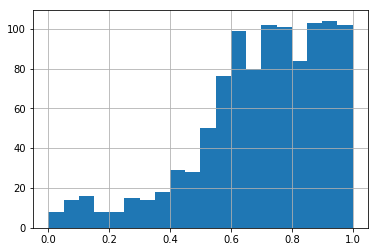

In [18]:
ax3 = fig.add_subplot(1, 2, 2)
ax3.set_title("Histogram of year(normalized)")
ax3.set_xlabel('year')
ax3.set_ylabel('Number of case')
df['year'].hist(bins=20) 

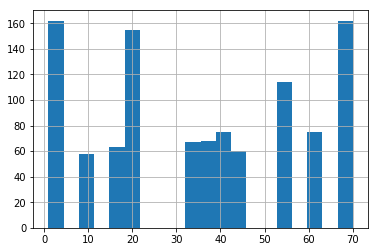

In [19]:
ax4 = fig.add_subplot(1, 2, 2)
ax4.set_title("Histogram of case")
ax4.set_xlabel('case')
ax4.set_ylabel('Number of case')
df['case'].hist(bins=20) 

In [20]:
df['case']=(df['case']-df['case'].min())/(df['case'].max()-df['case'].min())

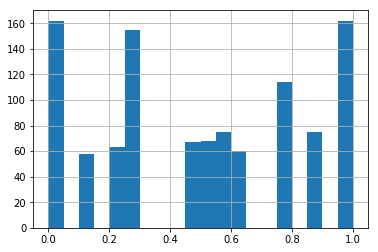

In [21]:
ax4 = fig.add_subplot(1, 2, 2)
ax4.set_title("Histogram of case")
ax4.set_xlabel('case')
ax4.set_ylabel('Number of case')
df['case'].hist(bins=20) 

In [22]:
df.head()

,case,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,0.0,0.064935,1,0.000070,0,0,0.0,0.206718,0,0,0,1
1,0.0,0.071429,0,0.000071,0,0,0.0,0.223365,0,0,0,0
2,0.0,0.077922,0,0.000070,0,0,0.0,0.192223,0,0,0,0
3,0.0,0.084416,0,0.000069,0,0,0.0,0.219233,0,0,0,0
4,0.0,0.090909,0,0.000069,0,0,0.0,0.191924,0,0,0,0


## Random Forest

In [23]:
df.isnull().sum()

case                               0
year                               0
systemic_crisis                    0
exch_usd                           0
domestic_debt_in_default           0
sovereign_external_debt_default    0
gdp_weighted_default               0
inflation_annual_cpi               0
independence                       0
currency_crises                    0
inflation_crises                   0
banking_crisis                     0
dtype: int64

From the figure above, we can see there is no missing value in each column of the dataframe. So now, we can move on to the next step.

The first thing we need to do is to split the dataframe into two pieces. We are going to predict the `banking_crisis` attributes. So we set it as target attributes and all rest of attributes are used to predict the target.

In [50]:
# set target attribute 'banking_crisis'
target = df['banking_crisis']

# set predictor attributes
predictors = df.drop('banking_crisis',axis=1).values

In [51]:
# split data sets for training and testing (0.8:0.2)
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.20, shuffle=True, stratify=target)

In [52]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(847, 11) (847,)
(212, 11) (212,)


We can see the data has been splitted into 8:2 (Training:Testing). The resulting training set has 847 observations and the testing set has 212 observations.

In [53]:
print(y_train.value_counts())
print('\n')

most_freq_class = y_train.value_counts().index[0]
print('Most frequent class in training dataset: ', most_freq_class)
print('\n')

print('Baseline accuracy:', round(y_test.value_counts()[most_freq_class] / y_test.count(), 3))

0    772
1     75
Name: banking_crisis, dtype: int64


Most frequent class in training dataset:  0


Baseline accuracy: 0.91


In [54]:
RF_classifier = RandomForestClassifier(n_estimators=100)
RF_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [55]:
# create a pipeline for Random Forest
RF_pipeline = Pipeline([
    ('sc', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('rf', RF_classifier)
])

In [56]:
RF_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('sc', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_d...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [57]:
RF_scores = cross_val_score(estimator=RF_pipeline,
                           X=X_train,
                           y=y_train,
                           cv=10,
                           n_jobs=1)
print('RF Accuracy Scores: %s' % RF_scores)
print('\n')
print('Average RF Accuracy Scores: %.3f' % np.mean(RF_scores))

RF Accuracy Scores: [0.97674419 0.94186047 0.92941176 0.96470588 0.90588235 0.94047619
 0.92857143 0.96428571 0.95238095 0.96428571]


Average RF Accuracy Scores: 0.947


In [58]:
RF_y_pred = RF_pipeline.predict(X_test)
RF_y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [59]:
print("Accuracy Score:", accuracy_score(y_test, RF_y_pred))
print("F1 Score:", f1_score(y_test, RF_y_pred))
print("Recall Score:", recall_score(y_test, RF_y_pred))

Accuracy Score: 0.9481132075471698
F1 Score: 0.6666666666666667
Recall Score: 0.5789473684210527


In [60]:
pd.crosstab(y_test, RF_y_pred, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
0,190,3
1,8,11


## Gaussian Naive Bayes

In [41]:
# set target attribute 'banking_crisis'
target = df['banking_crisis']

# set predictor attributes
predictors = df.drop('banking_crisis',axis=1).values

In [42]:
# split data sets for training and testing
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.20, shuffle=True, stratify=target)

In [43]:
NB_classifier = GaussianNB()
NB_classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [44]:
# create a pipeline for Gaussian Naive Bayes
NB_pipeline = Pipeline([
    ('sc', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('nb', NB_classifier)
])

In [45]:
NB_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('sc', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('nb', GaussianNB(priors=None, var_smoothing=1e-09))])

In [46]:
NB_scores = cross_val_score(estimator=NB_pipeline,
                           X=X_train,
                           y=y_train,
                           cv=10,
                           n_jobs=1)
print('NB Accuracy Scores: %s' % NB_scores)
print('\n')
print('Average NB Accuracy Scores: %.3f' % np.mean(NB_scores))

NB Accuracy Scores: [0.88372093 0.86046512 0.92941176 0.89411765 0.95294118 0.91666667
 0.9047619  0.9047619  0.85714286 0.92857143]


Average NB Accuracy Scores: 0.903


In [47]:
NB_y_pred = NB_pipeline.predict(X_test)
NB_y_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [48]:
print("Accuracy Score:", accuracy_score(y_test, NB_y_pred))
print("F1 Score:", f1_score(y_test, NB_y_pred))
print("Recall Score:", recall_score(y_test, NB_y_pred))

Accuracy Score: 0.910377358490566
F1 Score: 0.5365853658536586
Recall Score: 0.5789473684210527


In [49]:
pd.crosstab(y_test, NB_y_pred, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
0,182,11
1,8,11
